<a href="https://colab.research.google.com/github/anitaNorouzi/ai-projects/blob/main/Data_cleaning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install kaggle
!pip install -q kaggle
import os
print(os.path.exists('kaggle.json'))
from google.colab import files

uploaded = files.upload()


True


Saving kaggle.json to kaggle (2).json


In [ ]:
# Move the uploaded file to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d zusmani/pakistanintellectualcapitalcs
! unzip pakistanintellectualcapitalcs.zip

pakistanintellectualcapitalcs.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  pakistanintellectualcapitalcs.zip
replace Pakistan Intellectual Capital - Computer Science - Ver 1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime


In [ ]:
import charset_normalizer
# look at the first ten thousand bytes to guess the character encoding
#with open("Pakistan Intellectual Capital - Computer Science - Ver 1.csv", 'rb') as rawdata:
#    result = charset_normalizer.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'cp775', 'language': 'English', 'confidence': 1.0}


In [ ]:
file_path = 'Pakistan Intellectual Capital - Computer Science - Ver 1.csv'
try:
  file_content = pd.read_csv(file_path, encoding='cp775')
        # Now you can continue with your code to process the file content
        # For example, print the content
    #print(file_content)


except FileNotFoundError:
    print(f"The file '{file_path}' does not exist.")

except UnicodeDecodeError as e:
    print(f"Error decoding file: {e}")

#np.random.seed(0)
file_content.head()
print(file_content.columns)

Index(['S#', 'Teacher Name', 'University Currently Teaching', 'Department',
       'Province University Located', 'Designation', 'Terminal Degree',
       'Graduated from', 'Country', 'Year',
       'Area of Specialization/Research Interests', 'Other Information'],
      dtype='object')


In [ ]:
# Deleting spaces and make strings low case
file_content['Country'] = file_content['Country'].str.strip()
file_content['Country'] = file_content['Country'].str.lower()
try:
    # Access the 'Country' column
    countries = file_content['Country'].dropna().unique()

    # Display the unique countries
    #print(countries)

except KeyError:
    print("Column 'Country' not found in the DataFrame.")
except Exception as e:
    print(f"An error occurred: {e}")
#Sort by alphabet
#countries.sort()


countries

array(['france', 'thailand', 'italy', 'pakistan', 'germany', 'usa',
       'china', 'south korea', 'malaysia', 'sweden', 'canada', 'norway',
       'ireland', 'new zealand', 'portugal', 'russian federation',
       'finland', 'netherland', 'greece', 'turkey', 'macau', 'singapore',
       'denmark', 'japan', 'hongkong', 'mauritius', 'scotland'],
      dtype=object)

In [ ]:
!pip install fuzzywuzzy

import fuzzywuzzy
from fuzzywuzzy import process
# my code using fuzzywuzzy here
# get the top 4 closest matches to "usa"
#matches = fuzzywuzzy.process.extract('usa', countries, limit=4, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
#matches
#print(matches[0], matches[1], matches[2])

In [ ]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 40):
    # get a list of unique strings
    strings = df[column].unique()

    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    #The list comprehension creates a new list containing only
    #the first elements (matches[0]) of the pairs that satisfy the condition.
    #it collects the first elements of the matches where the corresponding second element is greater than or equal to min_ratio
    #matched[0] ---> country names          matches[1]---> ratio

    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches
    df.loc[rows_with_matches, column] = string_to_match
    print("All done!")
replace_matches_in_column(df=file_content, column='Country', string_to_match="usa")
# get all the unique values in the 'Country' column
#countries = file_content['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

All done!


array(['canada', 'china', 'denmark', 'finland', 'france', 'germany',
       'greece', 'hongkong', 'ireland', 'italy', 'japan', 'macau',
       'malaysia', 'mauritius', 'netherland', 'new zealand', 'norway',
       'pakistan', 'portugal', 'russian federation', 'scotland',
       'singapore', 'south korea', 'sweden', 'thailand', 'turkey', 'usa'],
      dtype=object)

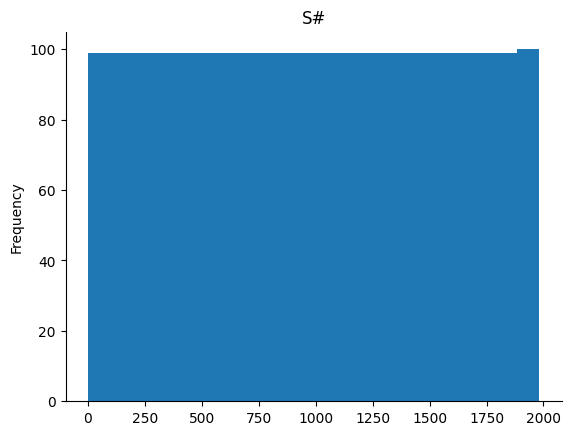

In [ ]:
# @title S#

from matplotlib import pyplot as plt
file_content['S#'].plot(kind='hist', bins=20, title='S#')
plt.gca().spines[['top', 'right',]].set_visible(False)